In [29]:
import requests
import time
import os
import pandas as pd
from io import StringIO 
import matplotlib.pyplot as plt
from IPython.display import clear_output

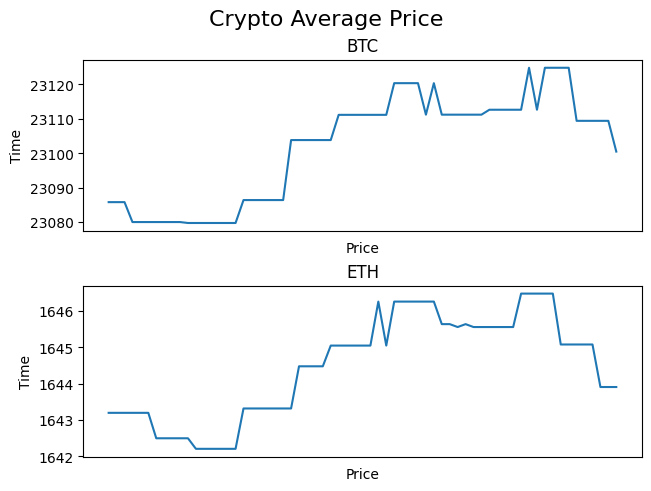

KeyboardInterrupt: 

In [35]:
while True:
    data_BTC = requests.get(
            'http://localhost:9000/exp',
            {
                'query': "SELECT *, avg(amount) AS 'average' from 'crypto' WHERE currency = 'BTC'",
            })
    data_BTC_csv = StringIO(data_BTC.text)
    df_BTC = pd.read_csv(data_BTC_csv, sep=",", header=0)

    data_ETH = requests.get(
            'http://localhost:9000/exp',
            {
                'query': "SELECT *, avg(amount) AS 'average' from 'crypto' WHERE currency = 'ETH'",
            })
    data_ETH_csv = StringIO(data_ETH.text)
    df_ETH = pd.read_csv(data_ETH_csv, sep=",", header=0)

    fig, axs = plt.subplots(2, 1, constrained_layout=True)
    axs[0].plot(df_BTC['timestamp'], df_BTC['average'])
    axs[0].set_title('BTC')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Price')
    axs[0].axes.get_xaxis().set_ticks([])


    axs[1].plot(df_ETH['timestamp'], df_ETH['average'])
    axs[1].set_title('ETH')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Price')
    axs[1].axes.get_xaxis().set_ticks([])

    fig.suptitle('Crypto Average Price', fontsize=16)

    plt.show()
    time.sleep(3)
    clear_output(wait=True)